In [10]:
%load_ext autoreload
%autoreload 2

import random, time
import matplotlib.pyplot as plt
from pair import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Overall Evaulation: In terms of efficiency, KMeans can be beneficial given a known number of clusters and a small number of output clusters k. In terms of automation, Hierarchical clustering is preferred. However, in terms of quality, neither of the two supersede the other. It is pertinent to note that the current implementations of the two algorithms are not optimal. We can do much better in running time for both algorithms. On the other hand, while working with large datasets, KMeans might be the only choice.

# Efficiency

In [11]:
# plotting that tests the running time of two algos
# random.seed(209523948)
M = 1
stimes = []
ftimes = []
for n in range(2, 201, 1):
    points = [(random.random()*M, random.random()*M) for _ in range(n)]
    points.sort(key=lambda x: x[0])  # sorted by x-coord
    clusters = create_dummy_clusters(points)

    stime = time.time()
    min_dist, pu, pv = fast_closest_pair(map(lambda x: x.copy(), clusters))
    etime = time.time()
    elapse = etime - stime
    ftimes.append(elapse)

    stime = time.time()
    min_dist, pu, pv = slow_closest_pair(map(lambda x: x.copy(), clusters))
    etime = time.time()
    elapse = etime - stime
    stimes.append(elapse)

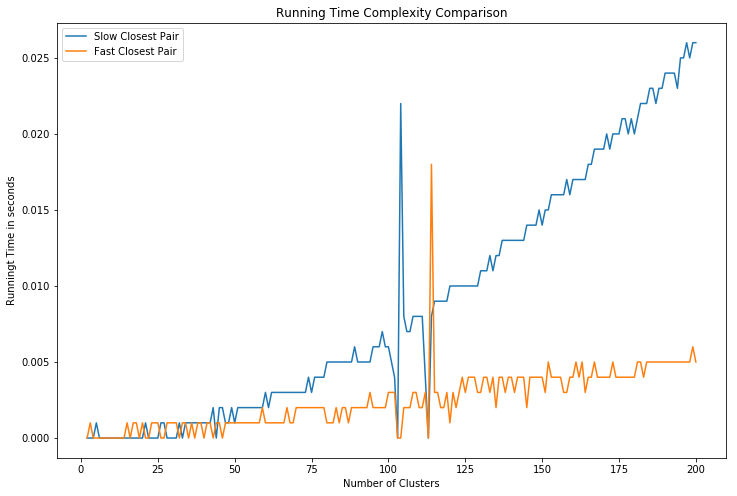

In [12]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 201, 1), stimes, label='Slow Closest Pair')
plt.plot(range(2, 201, 1), ftimes, label='Fast Closest Pair')
plt.title('Running Time Complexity Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Runningt Time in seconds')
plt.legend()
plt.show()

In [ ]:
from alg_project3_viz import run_example

Displaying 15 hierarchical clusters


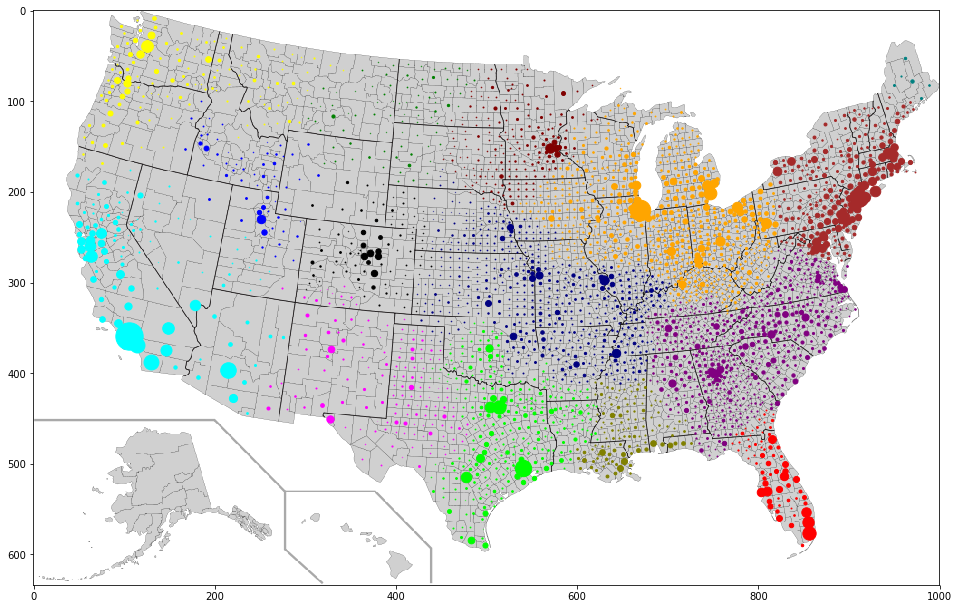

In [12]:
_ = run_example(data='3108', algo='hierarch', num_k=15)

Displaying 15 k-means clusters


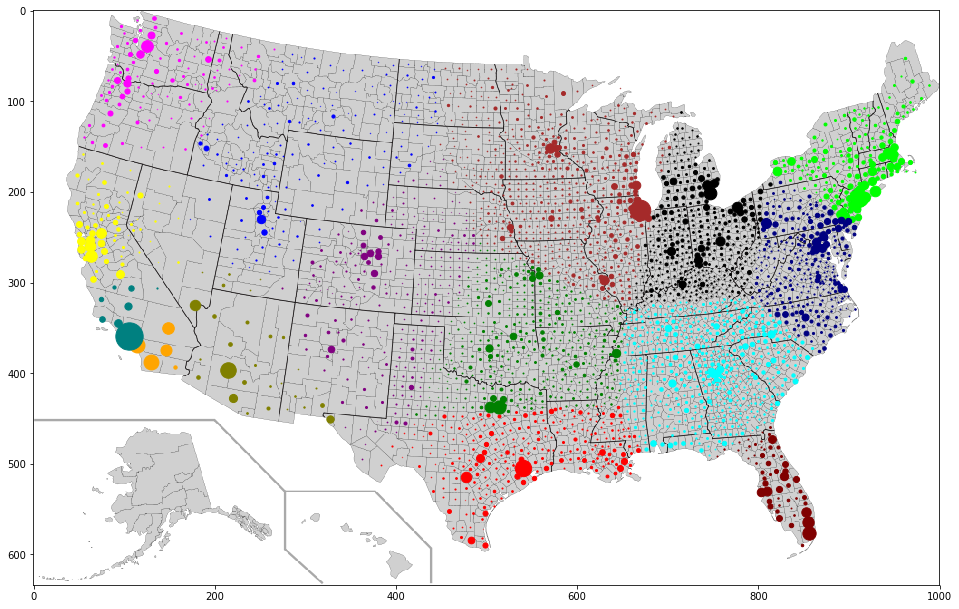

In [11]:
_ = run_example(data='3108', algo='kmeans', num_k=15, num_iter=5)

Q4: Kmeans is much faster when the desired output [k clusters] is a small fraction of the number of input clusters. It has O(nqk) complexity, but Hierarchical has O(n**2 logn) complexity. In short, the Hierarchical clustering works the way up compared to constant operations in Kmeans; thus, KMeans is faster in this situation.

# Automation

In [22]:
from alg_project3_viz import run_example

Displaying 9 hierarchical clusters
Clustering Distorition 1.75163886916e+11


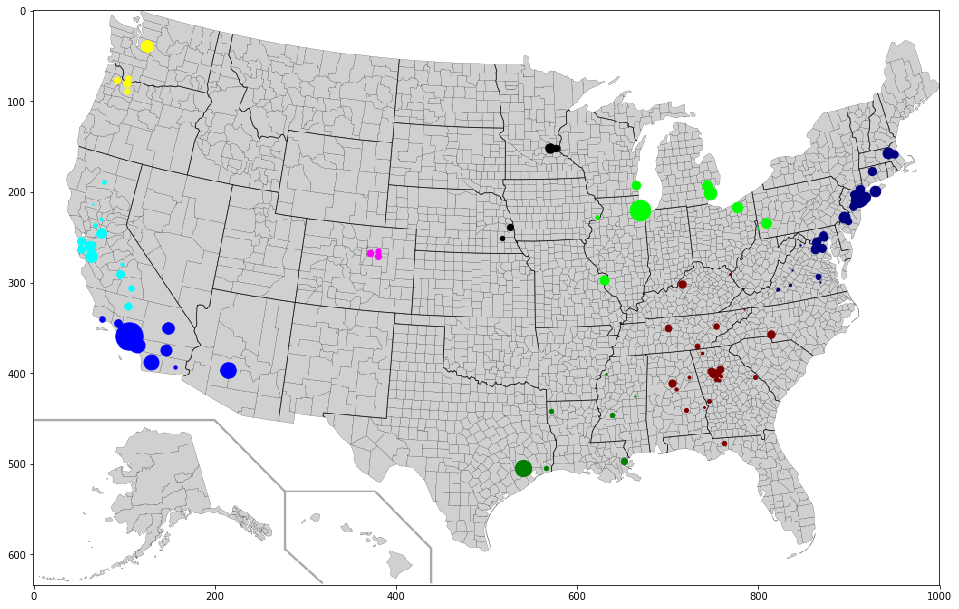

In [45]:
clusters = run_example(data='111', algo='hierarch', num_k=9)

Displaying 9 k-means clusters
Clustering Distorition 2.71254226924e+11


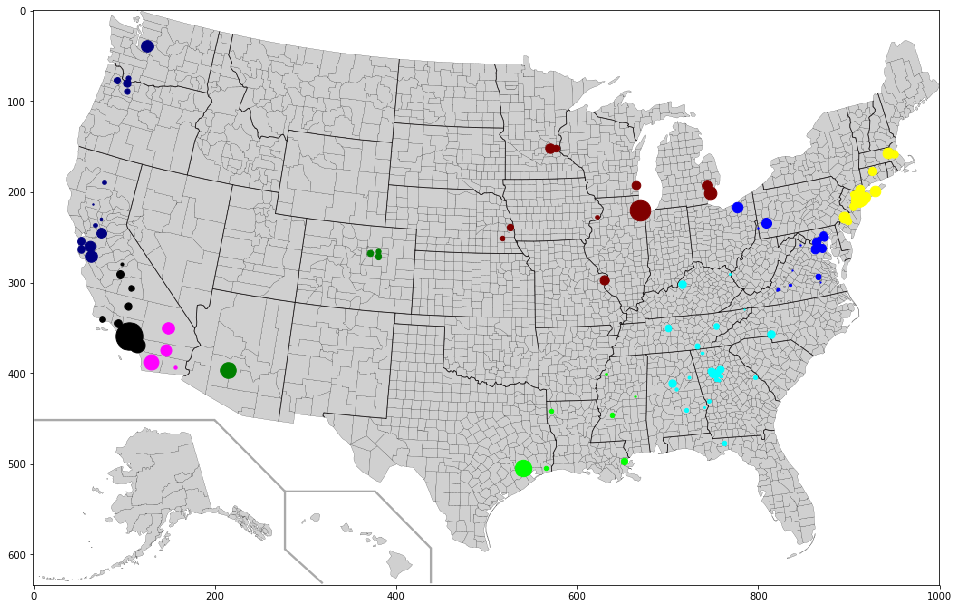

In [32]:
clusters = run_example(data='111', algo='kmeans', num_k=9, num_iter=5)

Q8: Hierarchical clustering has 3 clusters located on the west coast compared to 4 clusters generated by KMeans clustering. Clusters generated by the Hierarchical method were evenly distributed by Seattle, San Francisco, and LA. In contrast, KMeans grouped Seattle with San Francisco and split the LA metro into LA and San Diego. Phoenix is by itself. The difference is primarily because of the initialization of the KMeans algorithm. It started with choosing the 9 most populated counties. With each iteration, it failed to pull itself out of the local optimal point. Moreover, the number of k was given and fixed; thus, the algorithm must squeeze in outliers and create awkward cluster shapes. 

Q9: Hierarchical clustering generates clusters primarily by distance and through a bottom-up approach. KMeans, in contrast, does the clustering through a cross-sectional scan by the given k-cluster parameter. In this sense, the Hierarchical clustering algorithm requires less human supervision.

# Quality

In [2]:
import matplotlib.pyplot as plt

from alg_project3_viz import load_data_table, DATA
from alg_cluster import Cluster
from pair import compute_distortion, kmeans_clustering, hierarchical_clustering


def copy_clusters(clusters):
    return map(lambda x: x.copy(), clusters)

def kmeans_clustering_iter5(clusters, num_k):
    return kmeans_clustering(clusters, num_k, num_iter=5)

def compute_metrics(data_name, k_lst):
    # read in data
    data_tbl = load_data_table(DATA[data_name])
    algos = {'kmeans': kmeans_clustering_iter5, 'hierarchical': hierarchical_clustering}
    metrics = {algo:[] for algo in algos}

    # creats clusters every data point
    cluster_list = []
    for data in data_tbl:
        cluster_list.append(Cluster(set([data[0]]), *data[1:]))

    # calculate kmeans clusters with metrics
    for k in k_lst:
        _clusters = copy_clusters(cluster_list)
        clstr = algos['kmeans'](_clusters, k)
        
        distort = compute_distortion(clstr, data_tbl)
        metrics['kmeans'].append(distort)
    
    # now is hierarchical
    # use its proprty that high clusters is made of lower clusters
    _clusters = copy_clusters(cluster_list)
    for k in k_lst[::-1]:
        clstr = algos['hierarchical'](_clusters, k)
        distort = compute_distortion(clstr, data_tbl)
        metrics['hierarchical'].insert(0, distort)
    
    return metrics

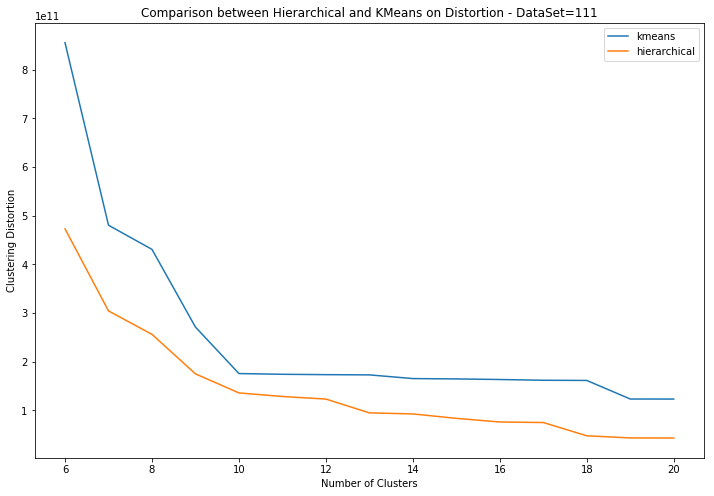

In [7]:
k_lst = range(6, 21)
metrics = compute_metrics('111', k_lst)
plt.figure(figsize=(12,8))
plt.plot(k_lst, metrics['kmeans'], label='kmeans')
plt.plot(k_lst, metrics['hierarchical'], label='hierarchical')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Distortion')
plt.title('Comparison between Hierarchical and KMeans on Distortion - DataSet=111')
plt.legend()

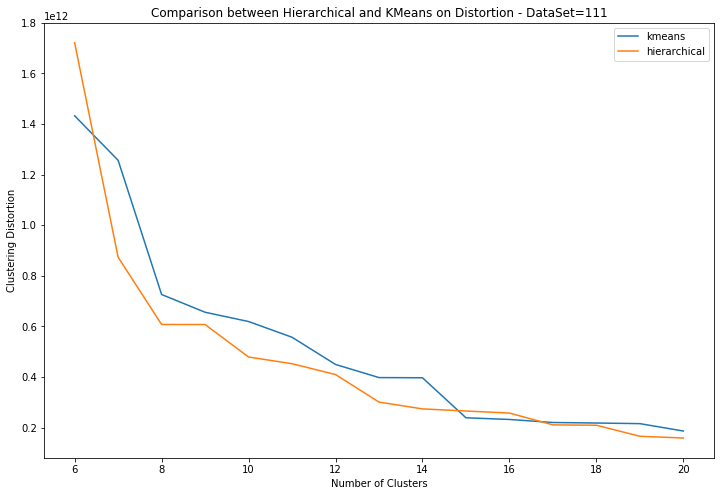

In [8]:
k_lst = range(6, 21)
metrics = compute_metrics('290', k_lst)
plt.figure(figsize=(12,8))
plt.plot(k_lst, metrics['kmeans'], label='kmeans')
plt.plot(k_lst, metrics['hierarchical'], label='hierarchical')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Distortion')
plt.title('Comparison between Hierarchical and KMeans on Distortion - DataSet=111')
plt.legend()

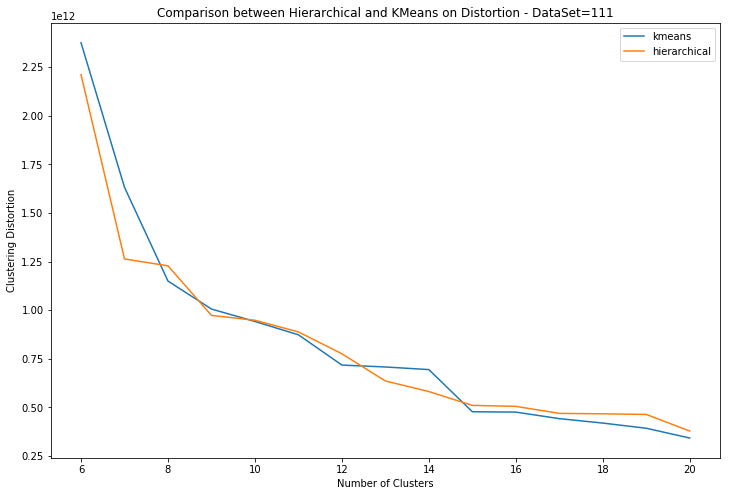

In [9]:
k_lst = range(6, 21)
metrics = compute_metrics('896', k_lst)
plt.figure(figsize=(12,8))
plt.plot(k_lst, metrics['kmeans'], label='kmeans')
plt.plot(k_lst, metrics['hierarchical'], label='hierarchical')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Distortion')
plt.title('Comparison between Hierarchical and KMeans on Distortion - DataSet=111')
plt.legend()

Q11: On the 111-dataset, Hierarchical Clustering consistently outperforms KMeans in terms of the measure of distortion. On 290 and 896 datasets, the two methods have marginal differences.